<h2>Import and Loading</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Configurazione Grafici
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Carica il dataset
csv_file = "dataset_texture_analysis.csv"
try:
    df = pd.read_csv(csv_file)
    print(f"Dataset caricato: {df.shape[0]} righe, {df['song_name'].nunique()} canzoni.")
    display(df.head())
except FileNotFoundError:
    print("File CSV non trovato! Esegui prima lo script generate_dataset.py")

Dataset caricato: 202760 righe, 20 canzoni.


,song_name,chunk_index,timestamp_sec,contrast,flatness,onset,zcr,chroma_var
0,Don't Start Now.mp3,45,1.045,11.41,0.0008,1.084,0.0268,0.0343
1,Don't Start Now.mp3,46,1.068,9.89,0.0010,0.154,0.0092,0.0133
2,Don't Start Now.mp3,47,1.091,8.17,0.0049,0.214,0.0051,0.0346
3,Don't Start Now.mp3,48,1.115,9.09,0.0028,0.188,0.0070,0.0140
4,Don't Start Now.mp3,49,1.138,9.52,0.0009,0.326,0.0057,0.0144


<h2>Calcolo Medie e Normalizzazione</h2>

In [6]:
# Raggruppa per canzone e calcola la media delle feature
feature_cols = ['contrast', 'flatness', 'onset', 'zcr', 'chroma_var']
df_mean = df.groupby('song_name')[feature_cols].mean()

print("Medie per canzone:")
display(df_mean.sort_values(by='contrast', ascending=False))

Medie per canzone:


,contrast,flatness,onset,zcr,chroma_var
song_name,,,,,
Fuck My Computer.mp3,14.575724,0.012525,0.723798,0.053156,0.016824
Von dutch.mp3,14.308792,0.009795,0.631017,0.049428,0.013790
That's What I Like.mp3,14.036073,0.012268,0.676652,0.053927,0.015386
C'era una Vodka.mp3,13.729273,0.006811,0.669064,0.036426,0.017693
Don't Start Now.mp3,13.718544,0.008969,0.666977,0.047430,0.015304
FE!N (feat. Playboi Carti).mp3,13.484869,0.010438,0.707499,0.051526,0.016843
Glimpse of Us.mp3,13.450335,0.003972,0.494422,0.022825,0.019145
Virtual Insanity - Remastered 2013.mp3,13.445236,0.005740,0.651678,0.031634,0.019237
Blue World.mp3,13.426486,0.008878,0.653779,0.041432,0.018972


<h2>Analisi Dinamica nel Tempo</h2>

Indici disponibili: [(0, "Don't Start Now.mp3"), (1, 'Dracme.mp3'), (2, 'FE!N (feat. Playboi Carti).mp3'), (3, 'Blue World.mp3'), (4, 'Dean Town.mp3'), (5, 'By the Way.mp3'), (6, "C'era una Vodka.mp3"), (7, 'Fuck My Computer.mp3'), (8, 'HUMBLE..mp3'), (9, "That's What I Like.mp3"), (10, 'Glimpse of Us.mp3'), (11, 'End Of Summer.mp3'), (12, 'The Metal.mp3'), (13, 'i love you.mp3'), (14, 'Revolution 909.mp3'), (15, 'Von dutch.mp3'), (16, 'Thick Skull.mp3'), (17, 'Unsainted.mp3'), (18, 'Wings.mp3'), (19, 'Virtual Insanity - Remastered 2013.mp3')]


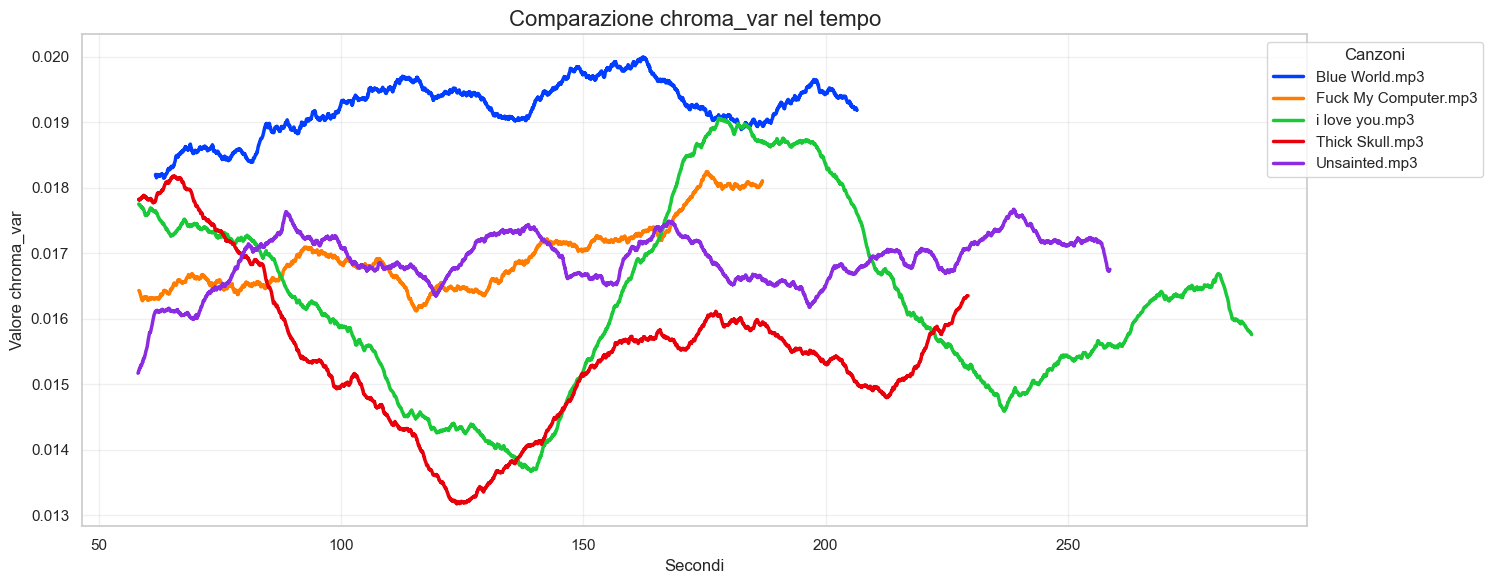

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurazione
# Stampa i nomi per aiutarti a scegliere (commentalo se sai già gli indici)
all_songs = df['song_name'].unique()
print("Indici disponibili:", list(enumerate(all_songs)))

# SELEZIONE CANZONI: Inserisci gli indici delle canzoni che vuoi comparare
# Esempio: [0, 1] compara la prima e la seconda. [12] ne prende solo una.
selected_indices = [7, 17, 13, 3, 16] 

target_songs = all_songs[selected_indices]
feature_to_plot = 'chroma_var' # Scegli tra: 'contrast', 'flatness', 'onset', 'zcr', 'chroma_var'
window_size = 2500 # Quanto "smussare" il grafico

# 2. Preparazione Dati
plt.figure(figsize=(15, 6))

# Filtriamo il dataset per includere SOLO le canzoni scelte
subset = df[df['song_name'].isin(target_songs)].copy()

# 3. Calcolo Media Mobile (Rolling Mean) PER OGNI CANZONE
# Usiamo groupby per assicurarci che la media mobile sia calcolata separatamente per ogni brano
subset['rolling_mean'] = subset.groupby('song_name')[feature_to_plot].transform(
    lambda x: x.rolling(window=window_size).mean()
)

# 4. Plotting
# Opzione A: Plot solo del trend (più pulito per comparare molte canzoni)
sns.lineplot(
    data=subset, 
    x='timestamp_sec', 
    y='rolling_mean', 
    hue='song_name',     # Colora diverso per ogni canzone
    linewidth=2.5, 
    palette='bright'
)

# 5. Estetica
plt.title(f"Comparazione {feature_to_plot} nel tempo", fontsize=16)
plt.xlabel("Secondi", fontsize=12)
plt.ylabel(f"Valore {feature_to_plot}", fontsize=12)
plt.legend(title='Canzoni', loc='upper right', bbox_to_anchor=(1.15, 1)) # Legenda fuori dal grafico
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import os

# --- CONFIGURAZIONE ---
INPUT_FILE = "dataset_texture_analysis.csv"
OUTPUT_FILE = "dataset_songs_stats_percentiles.csv"

def analyze_dataset_full_percentiles():
    if not os.path.exists(INPUT_FILE):
        print(f"❌ ERRORE: File '{INPUT_FILE}' non trovato.")
        return None

    print(f"📂 Caricamento dataset...")
    df = pd.read_csv(INPUT_FILE)

    if 'filename' in df.columns and 'song_name' not in df.columns:
        df.rename(columns={'filename': 'song_name'}, inplace=True)

    features = ['contrast', 'flatness', 'onset', 'zcr', 'chroma_var']

    # --- DEFINIZIONE PERCENTILI CUSTOM ---
    def p25(x):
        return x.quantile(0.25)

    def p75(x):
        return x.quantile(0.75)

    print("📊 Calcolo statistiche (Min, 25%, Mediana, 75%, Max)...")
    
    # Aggiungiamo p25 e p75 alla lista delle aggregazioni
    stats_df = df.groupby('song_name')[features].agg(['min', p25, 'median', p75, 'max', 'mean', 'std'])

    print("\n" + "="*110)
    print(" REPORT ANALISI DISTRIBUZIONE ".center(110, "="))
    print("="*110)

    for song in stats_df.index:
        print(f"🎵 {song}")
        print("-" * 110)
        for feat in features:
            row = stats_df.loc[song, feat]
            
            # Formattazione per visualizzare bene il range
            print(f"  • {feat.upper():<12} | "
                  f"Min: {row['min']:>6.3f} < "
                  f"[ 25%: {row['p25']:>6.4f} | "
                  f"Med: {row['median']:>6.4f} | "
                  f"75%: {row['p75']:>6.3f} ] < "
                  f"Max: {row['max']:>6.3f}")
        print("-" * 110 + "\n")
    
    return stats_df

# Esecuzione
df_stats = analyze_dataset_full_percentiles()

📂 Caricamento dataset...
📊 Calcolo statistiche (Min, 25%, Mediana, 75%, Max)...

======================================== REPORT ANALISI DISTRIBUZIONE ========================================
🎵 Blue World.mp3
--------------------------------------------------------------------------------------------------------------
  • CONTRAST     | Min:  6.040 < [ 25%: 12.6400 | Med: 13.5200 | 75%: 14.420 ] < Max: 18.420
  • FLATNESS     | Min:  0.000 < [ 25%: 0.0028 | Med: 0.0053 | 75%:  0.010 ] < Max:  0.187
  • ONSET        | Min:  0.006 < [ 25%: 0.4100 | Med: 0.5910 | 75%:  0.776 ] < Max:  6.525
  • ZCR          | Min:  0.001 < [ 25%: 0.0168 | Med: 0.0314 | 75%:  0.048 ] < Max:  0.336
  • CHROMA_VAR   | Min:  0.001 < [ 25%: 0.0105 | Med: 0.0170 | 75%:  0.025 ] < Max:  0.108
--------------------------------------------------------------------------------------------------------------

🎵 By the Way.mp3
----------------------------------------------------------------------------------------------